<a href="https://colab.research.google.com/github/bddonoso/prtueba/blob/master/modulo_2_sesion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

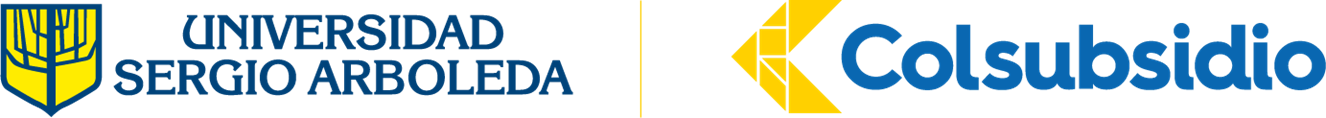

## **Caso estudio**

Se esta analizando la distribución de servicios en una ciudad, para ello se encuentra la información de cada uno de los bancos con sus diferentes sucursales, de cada una de ellas se cuenta con los datos de contacto y fechas de operación. Sin embargo, se encuentra una gran cantidad de información incompleta. Por ello se requiere hacer un acondicionamiento y análisis de los datos actuales, antes de tomar decisiones basados en esos datos. Toda la información disponible se encuentra en el archivo "Branches.csv"

# Limpieza de una base de datos

Importar librerias

In [ ]:
## libreria para manejo datos
import pandas as pd
## libreria para contrucción de gráficos
import matplotlib.pyplot as plt
# libreria para desarrollo decalculos
import numpy as np
# libreria para gráficos específicos
import seaborn as sns
# libreria para manipulación de fechas
import datetime as dt

Lectura de archivos


In [ ]:
# lectura de archivo
df = pd.read_csv("branches.csv")

### **1. Exploracion inicial de los datos**

Para ello usamos los métodos usuales, describe(), info() y la identificación de los missing values.

In [ ]:
df.describe()

,Bank_Code,Branch_Code,Zip_Code,POB,Operation_Cost
count,1488.000000,1488.000000,1.219000e+03,385.000000,1.435000e+03
mean,17.441532,480.303763,5.773018e+06,7639.890909,4.155348e+05
std,11.081010,276.306131,2.310628e+06,14264.326369,1.408061e+05
min,4.000000,1.000000,5.252000e+04,0.000000,3.001810e+05
25%,11.000000,201.750000,4.239222e+06,0.000000,3.498735e+05
50%,12.000000,515.000000,5.885849e+06,0.000000,4.022960e+05
75%,20.000000,690.250000,7.526724e+06,4105.000000,4.523585e+05
max,99.000000,999.000000,9.958551e+06,66883.000000,1.939276e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bank_Code            1488 non-null   int64  
 1   Bank_Name            1488 non-null   object 
 2   Branch_Code          1488 non-null   int64  
 3   Branch_Name          1483 non-null   object 
 4   Address              1485 non-null   object 
 5   City                 1474 non-null   object 
 6   Zip_Code             1219 non-null   float64
 7   POB                  385 non-null    float64
 8   Telephone            1444 non-null   object 
 9   Fax                  81 non-null     object 
 10  Free_Telephone       648 non-null    object 
 11  Handicap_Accessible  1462 non-null   object 
 12  Day_Closed           1289 non-null   object 
 13  Open_Date            1487 non-null   object 
 14  Operation_Cost       1435 non-null   float64
dtypes: float64(3), int64(2), object(10)
me

### **1. Missing Values**


A continuación se revisaran los valores vacios o nulos de la base de datos

<Axes: >

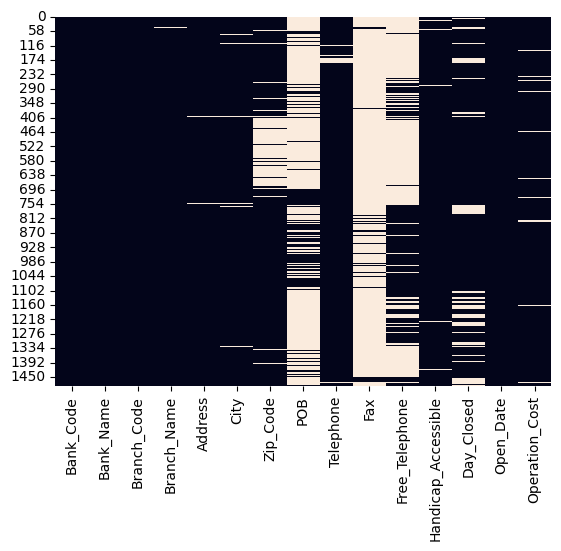

In [ ]:
sns.heatmap(df.isnull(), cbar= False)

Dado que las columnas de POB, Free_Telephone y Fax, no tienen información y no son relevantes, se eliminan las columnas asociadas.

In [ ]:
df.drop(["POB", "Fax", "Free_Telephone"], axis=1, inplace= True)

<Axes: >

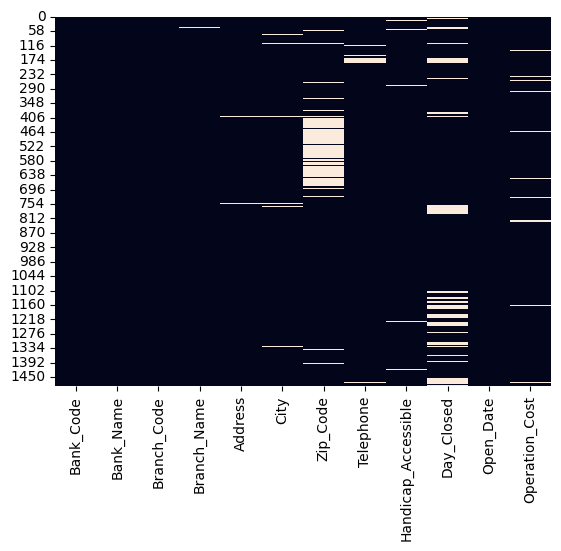

In [ ]:
sns.heatmap(df.isnull(), cbar= False)

##### **1.1 Imputar datos con la media**

Se completaran los campos numericos con la media de los datos.  
- Se usará para completar los datos vacios de los costos de operación.  

In [ ]:
# completar costos con la media de los costos
df['Operation_Cost'].fillna(df['Operation_Cost'].mean(), inplace = True)

/tmp/ipython-input-65-2419903180.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Operation_Cost'].fillna(df['Operation_Cost'].mean(), inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bank_Code            1488 non-null   int64  
 1   Bank_Name            1488 non-null   object 
 2   Branch_Code          1488 non-null   int64  
 3   Branch_Name          1483 non-null   object 
 4   Address              1485 non-null   object 
 5   City                 1474 non-null   object 
 6   Zip_Code             1219 non-null   float64
 7   Telephone            1444 non-null   object 
 8   Handicap_Accessible  1462 non-null   object 
 9   Day_Closed           1289 non-null   object 
 10  Open_Date            1487 non-null   object 
 11  Operation_Cost       1488 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 139.6+ KB


##### **1.2 Imputar datos con la moda (Completar las categóricas)**

Se completaran las columnas de tener acceso a minusbalidos, los días cerrados.

In [ ]:
df['Handicap_Accessible'].fillna(df['Handicap_Accessible'].mode()[0], inplace = True)

/tmp/ipython-input-67-236515199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Handicap_Accessible'].fillna(df['Handicap_Accessible'].mode()[0], inplace = True)


In [ ]:
# observar el día que usualmente estan cerrradas las sucursales
print(df['Day_Closed'].mode()[0])

Friday


In [ ]:
## Completar los datos con faltantes con el día más común que estan cerradas las sucursales
df['Day_Closed'].fillna(df['Day_Closed'].mode()[0], inplace = True)

/tmp/ipython-input-69-3256386729.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Day_Closed'].fillna(df['Day_Closed'].mode()[0], inplace = True)


In [ ]:
## Completar los datos con faltantes con el día más común que se abre la sucursale
df['Open_Date'].fillna(df['Open_Date'].mode()[0], inplace = True)

/tmp/ipython-input-70-228044478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Open_Date'].fillna(df['Open_Date'].mode()[0], inplace = True)


In [ ]:
## completar con el valor más repetido el código ZIP
##
## Completar los datos con faltantes con el día más común que se abre la sucursale
df['Zip_Code'].fillna(df['Zip_Code'].mode()[0], inplace = True)

/tmp/ipython-input-71-2035093226.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Zip_Code'].fillna(df['Zip_Code'].mode()[0], inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bank_Code            1488 non-null   int64  
 1   Bank_Name            1488 non-null   object 
 2   Branch_Code          1488 non-null   int64  
 3   Branch_Name          1483 non-null   object 
 4   Address              1485 non-null   object 
 5   City                 1474 non-null   object 
 6   Zip_Code             1488 non-null   float64
 7   Telephone            1444 non-null   object 
 8   Handicap_Accessible  1488 non-null   object 
 9   Day_Closed           1488 non-null   object 
 10  Open_Date            1488 non-null   object 
 11  Operation_Cost       1488 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 139.6+ KB


<Axes: >

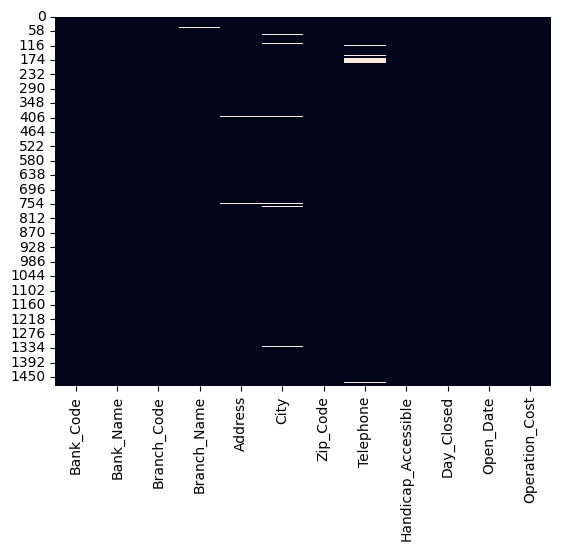

In [ ]:
sns.heatmap(df.isnull(), cbar= False)

##### **Ejercicio 1**
Analizar críticamente el impacto de la forma en que se completaron los missing values. Recomendaría otra forma de completar alguna de las columnas.

In [ ]:
### escriba su análisis crítico a continuación






In [1]:
## Si puede aplicar la propuesta, implementarla a continuación
df = df.dropna()
sns.heatmap(df.isnull(), cbar=False)





NameError: name 'df' is not defined

#### **1.3 Eliminar filas con blancos**

Posteriormente se eliminan las filas que finalmente tienen blancos.

<Axes: >

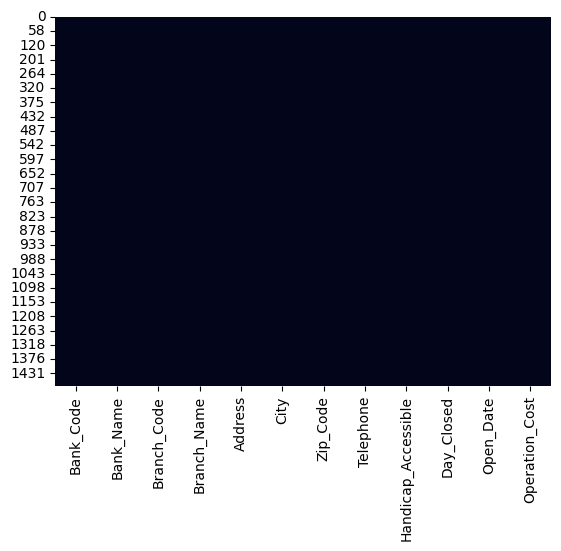

In [ ]:
df = df.dropna()
sns.heatmap(df.isnull(), cbar= False)

### **2. Identificación de outliers**

Con la base completa es posible desarrollar un análisis de outliers. Este caso solo es posible sobre variables numericas.

<Axes: >

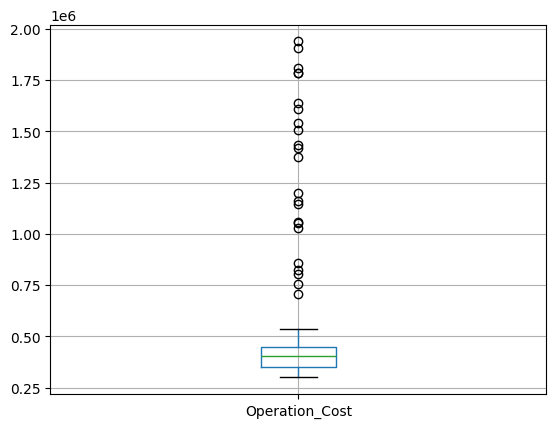

In [ ]:
df[['Operation_Cost']].boxplot()

#### 2.1 Identificacion limites con IQR

In [ ]:
df['Operation_Cost'].describe()

,Operation_Cost
count,1.425000e+03
mean,4.155914e+05
std,1.378515e+05
min,3.001810e+05
25%,3.515500e+05
50%,4.063480e+05
75%,4.496910e+05
max,1.939276e+06


In [ ]:
## determinación cuartil 1 - 25%
Q1 = df['Operation_Cost'].quantile(0.25)
print("El quartil 1 es: ", Q1)
## determinación cuartil 3 - 75%
Q3 = df['Operation_Cost'].quantile(0.75)
print("El quartil 3 es: ", Q3)
IQR = Q3 - Q1
print(f"El rango interquartilico (IQR) para la variable 'Operation_Cost' es: {IQR}")


El quartil 1 es:  351550.0
El quartil 3 es:  449691.0
El rango interquartilico (IQR) para la variable 'Operation_Cost' es: 98141.0


In [ ]:
## filtrado de la base eliminando los outliers por el método IQR
df_IQR = df[(df['Operation_Cost'] > (Q1 - 1.5*IQR)) & (df['Operation_Cost'] < (Q3 + 1.5*IQR))]

<Axes: >

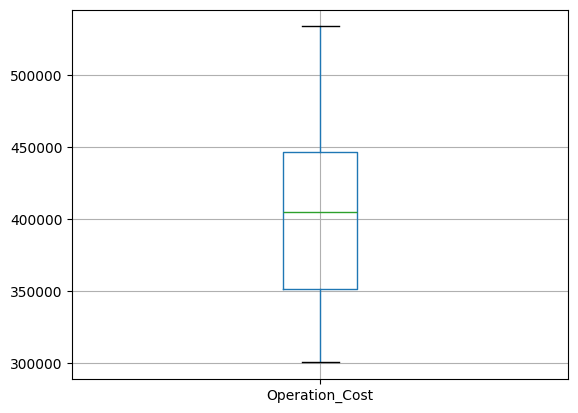

In [ ]:
## gráfico de los datos eliminando outliers
df_IQR[['Operation_Cost']].boxplot()

In [ ]:
df_IQR[['Operation_Cost']].describe()

,Operation_Cost
count,1402.000000
mean,400768.032008
std,57053.239016
min,300181.000000
25%,350898.250000
50%,405132.500000
75%,446890.750000
max,534075.000000


#### 2.2 Identificación de limites con Z score

In [ ]:
### determinación medidas para el Z_score
media = df['Operation_Cost'].mean()
print("la media del costo de operación es: ", media)

desviacion = df['Operation_Cost'].std()
print("la desviación del costo de operación es: ", desviacion)

la media del costo de operación es:  415591.4286843939
la desviación del costo de operación es:  137851.47282970097


In [ ]:
# determinación nueva columna datos estandar
df["Z"] = (df['Operation_Cost'] - media) / desviacion

In [ ]:
df.head(3)

,Bank_Code,Bank_Name,Branch_Code,Branch_Name,Address,City,Zip_Code,Telephone,Handicap_Accessible,Day_Closed,Open_Date,Operation_Cost,Z
0,13,Union Bank of Israel Ltd,143,Elad,"1 Shamai st., Elad 48900 1",El'ad,4080101.0,1-599-599-143,Yes,Sunday,14/12/2004,449218.0,0.243933
1,13,Union Bank of Israel Ltd,70,Petach Tikva,"26 Hahistadrut st., Petach Tikva 49540 26",Petah Tiqwa,4954043.0,1-599-599-070,Yes,Sunday,1/2/1949,361413.0,-0.393020
2,13,Union Bank of Israel Ltd,83,Mercaz Hacarmel,"4 Mahanim st., Haifa 34481 4",Haifa,3463413.0,1-599-599-083,Yes,Sunday,1/2/1949,384408.0,-0.226210


In [ ]:
# gráfica datos Z
df["Z"].describe()

,Z
count,1.425000e+03
mean,2.667652e-16
std,1.000000e+00
min,-8.372085e-01
25%,-4.645683e-01
50%,-6.705354e-02
75%,2.473646e-01
max,1.105309e+01


In [ ]:
## filtrado de la base eliminando los outliers por el método Z_score
df_Zscore = df[(df['Z'] > -3) & (df['Z'] < 3)]

<Axes: >

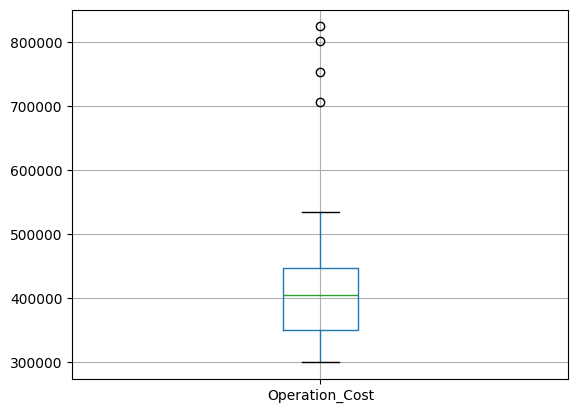

In [ ]:
## gráfico de los datos eliminando outliers
df_Zscore[['Operation_Cost']].boxplot()

#### 2.3 Identificación de limites con percentiles 5% y 95%

__________________________  
__________________________  

#### **Ejercicio 2**

Encontrar los limites por medio del método de los percentiles con 5% y 95%
- Gráfique los datos en un boxplot

In [ ]:
## coloque su código acá

p5 = df['Operation_Cost'].quantile(0.05)
p95 = df['Operation_Cost'].quantile(0.95)

df_percentiles = df[(df['Operation_Cost'] >= p5) & (df['Operation_Cost'] <= p95)]
df_percentiles [['Operation_Cost']].boxplot()






#### **Ejercicio 3**

Compare los tres métodos en función de la cantidad de datos que eliminan, y el cambio en la media y la desviación estandar posterior a la eliminación de los outliers.

In [ ]:
### coloque su código acá

print("Original: ", df['Operation_Cost'].mean(), df['Operation_Cost'].std())
print("IQR: ", df_IQR['Operation_Cost'].mean(), df_IQR['Operation_Cost'].std())
print("Z-Score: ", df_Zscore['Operation_Cost'].mean(), df_Zscore['Operation_Cost'].std())
print("Percentiles: ", df_percentiles['Operation_Cost'].mean(), df_percentiles['Operation_Cost'].std())





#### **Conclusión**

Presenta una conclusión del proceso de limpieza de los datos.
